# Points classification

Author: Jiqian Dong

Email: dong282@purdue.edu

In this tutorial, you will toy different classifications in point dataset in sklearn. You should be able to tune the parameters of different classifiers to see the difference in outputs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

CMAP = plt.cm.Spectral

In [2]:
def draw_decision_boundary(X,y,clf,ax):
    # scatter plot the raw data
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=CMAP)
    
    # plot the decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    try:
        Z = clf.decision_function(xy).reshape(XX.shape)
            # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '-.'])
    except Exception as e:
        print(e)
        Z = clf.predict_proba(xy)[:,1].reshape(XX.shape)
        ax.contour(XX, YY, Z, colors='k', levels=[0.25,0.5,0.75], alpha=0.5,
                   linestyles=['--', '-', '-.'])

    

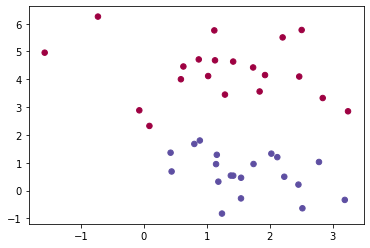

In [3]:
# we generate 40 separable points
X, y = make_blobs(n_samples=40, centers=2,random_state=0)
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=CMAP)


## 1. SVM model

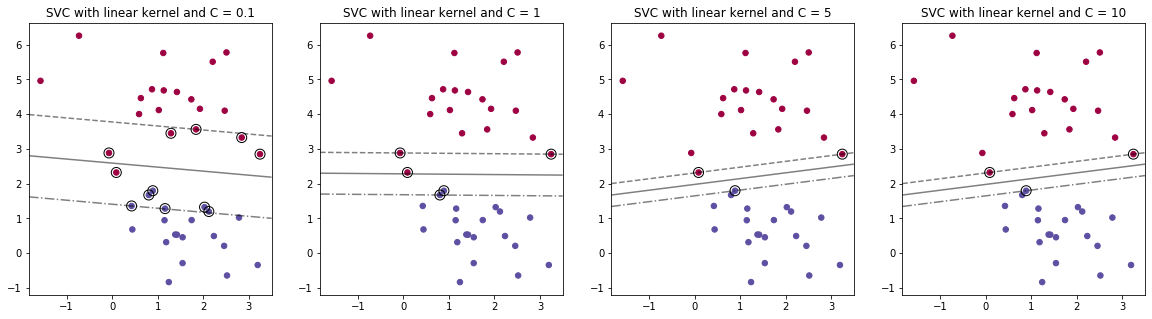

In [4]:
from sklearn import svm

Cs = [0.1,1,5,10] # Tune the regularization coeffient 
fig, axes = plt.subplots(1,len(Cs),figsize=(len(Cs)*5,5))
for ind,C in enumerate(Cs):
    ax = axes[ind]
    clf = svm.SVC(kernel='linear', C=C) # C is the penalty for slack variable. inversely proportional to your margin
    clf.fit(X, y)
    
    draw_decision_boundary(X,y,clf,ax)
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    title = "SVC with linear kernel and C = "+str(C)
    ax.set_title(title)

### Cross validation

sklearn has provided us with very good cross validation APIs, we don't even need to split the train test data for applying it. They provide a very good [tutorial](https://scikit-learn.org/stable/modules/cross_validation.html) for doing this.

In [5]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

scores

array([0.875, 1.   , 1.   , 1.   , 0.875])

### Kernel function

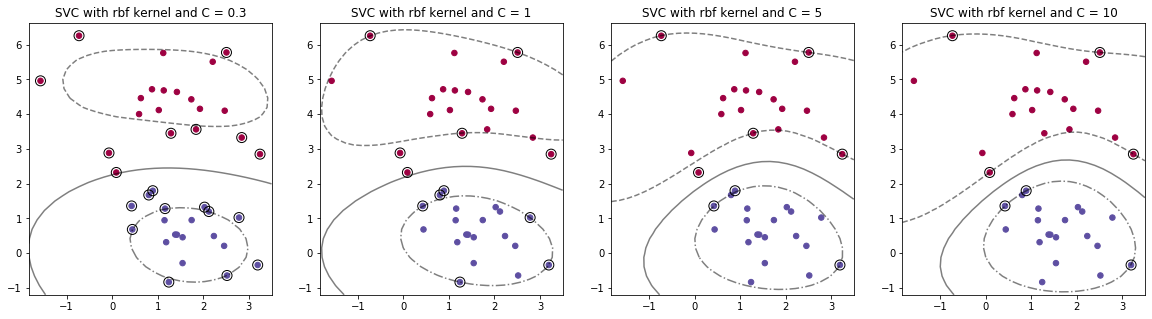

In [6]:
Cs = [0.3,1,5,10] # Tune the regulation coeffient 

fig, axes = plt.subplots(1,len(Cs),figsize=(len(Cs)*5,5))
for ind,C in enumerate(Cs):
    ax = axes[ind]
    clf = svm.SVC(kernel='rbf', C=C)
    clf.fit(X, y)
    
    draw_decision_boundary(X,y,clf,ax)
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    title = "SVC with rbf kernel and C = "+str(C)
    ax.set_title(title)

## 2. Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

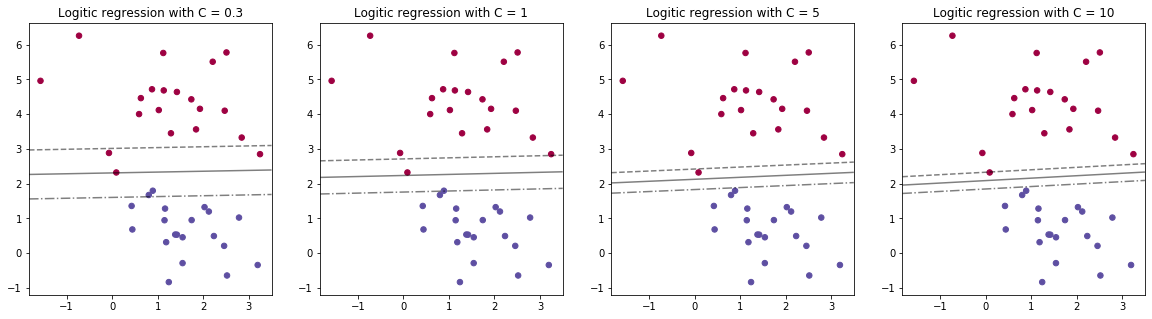

In [8]:
Cs = [0.3,1,5,10] # Tune the regulation coeffient 

fig, axes = plt.subplots(1,len(Cs),figsize=(len(Cs)*5,5))
for ind,C in enumerate(Cs):
    ax = axes[ind]
    clf = LogisticRegression(C=C)
    clf.fit(X, y)
    
    draw_decision_boundary(X,y,clf,ax)

    title = "Logitic regression with C = "+str(C)
    ax.set_title(title)

## 3. KNN 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

'KNeighborsClassifier' object has no attribute 'decision_function'
'KNeighborsClassifier' object has no attribute 'decision_function'
'KNeighborsClassifier' object has no attribute 'decision_function'
'KNeighborsClassifier' object has no attribute 'decision_function'


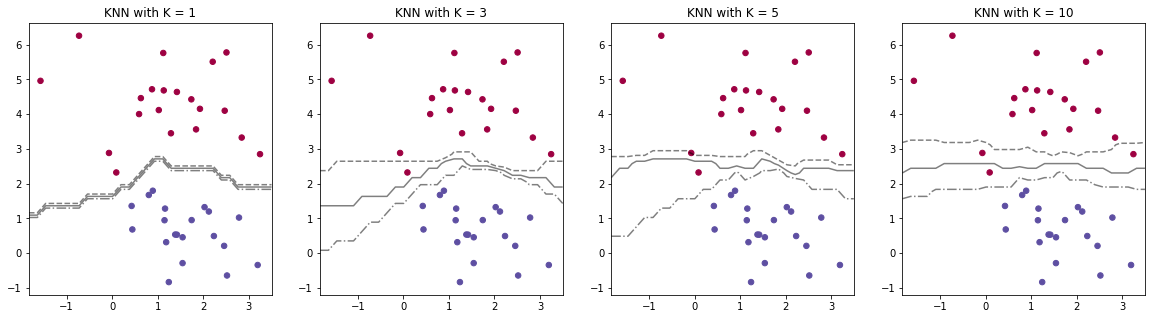

In [10]:

Neighbors = [1,3,5,10] # Tune the regulation coeffient 

fig, axes = plt.subplots(1,len(Neighbors),figsize=(len(Neighbors)*5,5))
for ind,k in enumerate(Neighbors):
    ax = axes[ind]
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    draw_decision_boundary(X,y,clf,ax)

    title = "KNN with K = "+str(k)
    ax.set_title(title)

In the figures above, the dashed lines represent the contours of probability of each sample $$P(x=1)=0.25, 0.5, 0.75$$

## 4. Perceptron

In [11]:
from sklearn.linear_model import Perceptron

/Users/jiqiandong/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.


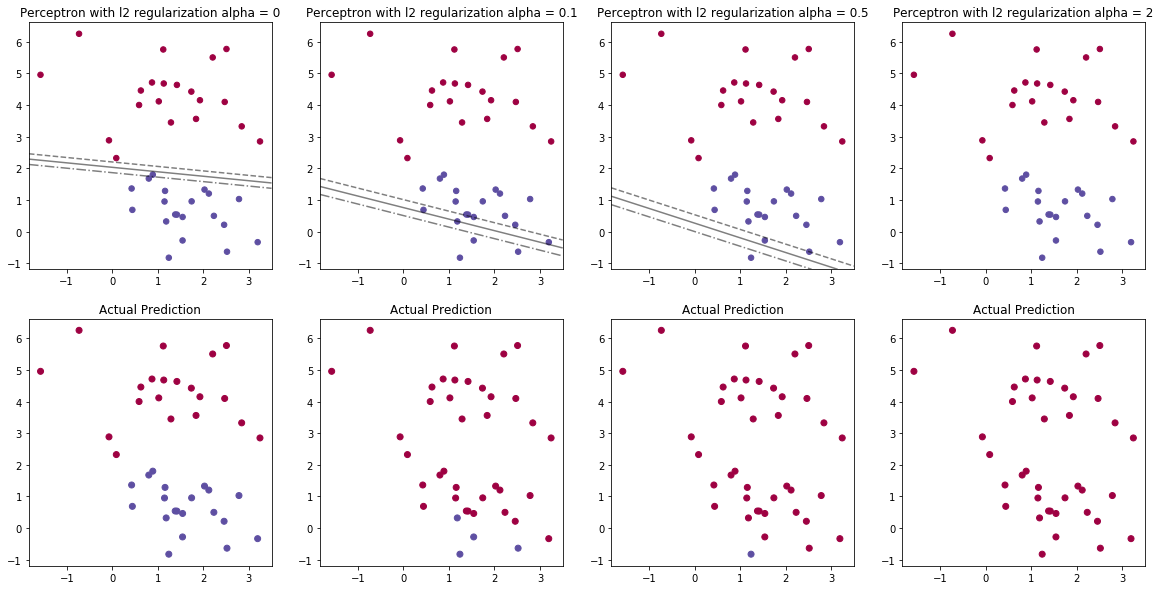

In [12]:
penalty_alphas = [0,0.1,0.5,2] # Tune the regulation coeffient 

fig, axes = plt.subplots(2,len(penalty_alphas),figsize=(len(penalty_alphas)*5,10))
for ind,a in enumerate(penalty_alphas):
    ax = axes[0,ind]
    clf = Perceptron(penalty='l2',alpha=a)
    clf.fit(X, y)
    draw_decision_boundary(X,y,clf,ax)
    title = "Perceptron with l2 regularization alpha = "+str(a)
    ax.set_title(title)
    

    ax = axes[1,ind]
    ax.scatter(X[:,0],X[:,1],c=clf.predict(X),cmap=CMAP)
    title = "Actual Prediction"
    ax.set_title(title)

As shown before, when the regularization penalty coefficient is too large, the model is predicting 0 all the time

## 5. Adaboost *

We need some non linear seperable dataset

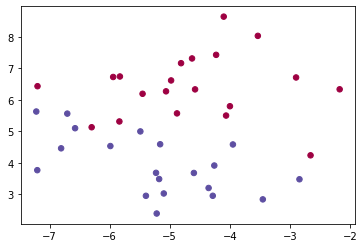

In [13]:
# we generate 40 separable points
X, y = make_blobs(n_samples=40, centers=2,random_state=511)
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=CMAP)


In [14]:
from sklearn.ensemble import AdaBoostClassifier

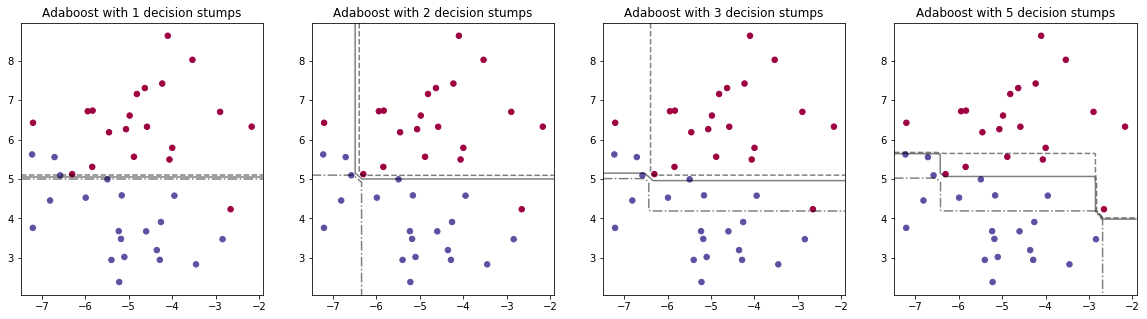

In [15]:
n_estimators_list = [1,2,3,5]

fig, axes = plt.subplots(1,len(n_estimators_list),figsize=(len(n_estimators_list)*5,5))

for ind,n in enumerate(n_estimators_list):
    ax = axes[ind]
    clf = AdaBoostClassifier(n_estimators=n)
    clf.fit(X, y)
    draw_decision_boundary(X,y,clf,ax)
    title = "Adaboost with %d decision stumps"%n
    ax.set_title(title)